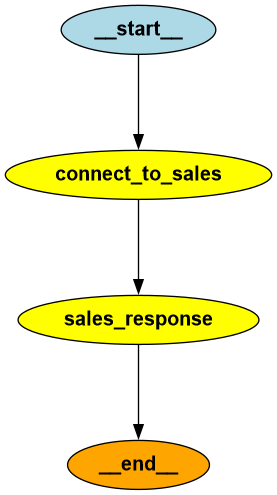

🤖 **Bot:** I want to buy your product.
🤖 **Bot:** Great! Let me connect you with our sales team right away. 🚀
🤖 **Bot:** We have the best offer for you 🚀
Final Discount:  30 %


In [3]:
from typing import Annotated, TypedDict
from langchain_core.messages import AnyMessage
from operator import add
from langgraph.graph import END, START, StateGraph, MessagesState
from langchain_core.messages import AIMessage, HumanMessage
from IPython.display import Image, display

# Define chatbot state with accumulated messages
class ChatBotState(MessagesState): # Chuyen tu TypedDict thanh MessagesState
    #messages: Annotated[list[AnyMessage],add] # MessagesState co the thay the dong nay
    discount: Annotated[int,add]


# Responses based on intent level
def connect_to_sales(state: ChatBotState):
    return {"messages": [AIMessage(content="Great! Let me connect you with our sales team right away. 🚀")],
            "discount": 10}


def sales_response(state: ChatBotState):
    return {"messages": [AIMessage(content="We have the best offer for you 🚀")],
            "discount": 20}


# Build chatbot conversation flow
graph_builder = StateGraph(ChatBotState)

# Add nodes

graph_builder.add_node("connect_to_sales", connect_to_sales)
graph_builder.add_node("sales_response", sales_response)

# Define conversation flow
graph_builder.add_edge(START, "connect_to_sales")
graph_builder.add_edge("connect_to_sales", "sales_response")
graph_builder.add_edge("sales_response", END)

# Compile chatbot
chatbot = graph_builder.compile()
# Display graph
try:
    display(Image(chatbot.get_graph().draw_png()))
except Exception:
    pass
# Simulate different conversations
test_inputs = "I want to buy your product."


messages = chatbot.invoke({"messages": [HumanMessage(content=test_inputs)]})

for message in messages["messages"]:
    print(f"🤖 **Bot:** {message.content}")


print("Final Discount: ",messages['discount'],'%')